In [11]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")

In [13]:
customer_data = pd.read_csv(r"C:\Users\USER\Downloads\MLProjectSummer\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [15]:
customer_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
for col in customer_data.columns:
    print(f"{col}: {customer_data[col].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

In [19]:
customer_data.drop("customerID",axis=1,inplace=True)

In [21]:
customer_data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [23]:
customer_data["Churn"].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

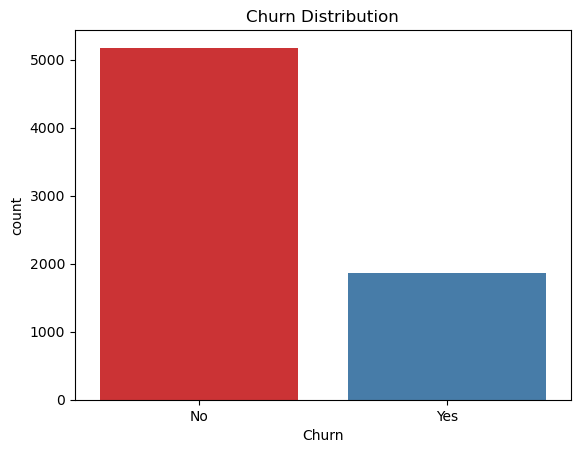

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Churn",data=customer_data,palette="Set1")
plt.title("Churn Distribution")
plt.show()

In [26]:
customer_data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [27]:
customer_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [31]:
customer_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
customer_data["TotalCharges"] = pd.to_numeric(customer_data["TotalCharges"], errors="coerce")

In [35]:
customer_data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [37]:
customer_data.dtypes.tail(2)

TotalCharges    float64
Churn            object
dtype: object

In [39]:
customer_data["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
customer_data["gender"] = le.fit_transform(customer_data["gender"])

In [43]:
customer_data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [45]:
customer_data["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [47]:
customer_data["Partner"] = le.fit_transform(customer_data["Partner"])

In [49]:
customer_data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [51]:
customer_data["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [53]:
customer_data["Dependents"] = le.fit_transform(customer_data["Dependents"])

In [55]:
customer_data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [57]:
customer_data["PhoneService"].unique()

array(['No', 'Yes'], dtype=object)

In [59]:
customer_data["PhoneService"] = le.fit_transform(customer_data["PhoneService"])

In [61]:
customer_data["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [63]:
# Use OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
multipipelines_dummies = pd.get_dummies(customer_data["MultipleLines"], prefix="Phone").astype("int64")

In [65]:
customer_data = pd.concat([multipipelines_dummies,customer_data],axis=1)

In [67]:
customer_data.drop("MultipleLines",axis=1,inplace=True)

In [69]:
customer_data.head(3)

,Phone_No,Phone_No phone service,Phone_Yes,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,0,1,0,1,0,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,1,0,0,0,34,1,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,1,0,0,1,0,0,0,2,1,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [71]:
customer_data["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [73]:
internetservice_dummies = pd.get_dummies(customer_data["InternetService"], prefix="Internet").astype("int64")

In [75]:
customer_data = pd.concat([internetservice_dummies,customer_data],axis=1)

In [77]:
customer_data.drop("InternetService",axis=1,inplace=True)

In [79]:
customer_data.head(2)

,Internet_DSL,Internet_Fiber optic,Internet_No,Phone_No,Phone_No phone service,Phone_Yes,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,1,0,0,0,1,0,1,0,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,1,0,0,1,0,0,0,34,1,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [81]:
customer_data["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [83]:
online_security_dummies = pd.get_dummies(customer_data["OnlineSecurity"], prefix="OnlineSecurity").astype("int64")

In [85]:
customer_data = pd.concat([online_security_dummies,customer_data],axis=1)

In [87]:
customer_data.drop("OnlineSecurity",axis=1,inplace=True)

In [89]:
customer_data.head(2)

,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Internet_DSL,Internet_Fiber optic,Internet_No,Phone_No,Phone_No phone service,Phone_Yes,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,1,1,0,0,1,0,0,1,0,0,0,34,1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [91]:
customer_data["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [93]:
online_backup_dummies = pd.get_dummies(customer_data["OnlineBackup"], prefix="OnlineBackup").astype("int64")

In [95]:
customer_data = pd.concat([online_backup_dummies,customer_data],axis=1)

In [97]:
customer_data.drop("OnlineBackup",axis=1,inplace=True)

In [99]:
customer_data.head(2)

,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Internet_DSL,Internet_Fiber optic,Internet_No,Phone_No,Phone_No phone service,Phone_Yes,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,34,1,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [101]:
customer_data["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [103]:
device_protection_dummies = pd.get_dummies(customer_data["DeviceProtection"], prefix="DeviceProtection").astype("int64")

In [105]:
customer_data  = pd.concat([device_protection_dummies,customer_data],axis=1)

In [107]:
customer_data.drop("DeviceProtection",axis=1,inplace=True)

In [109]:
customer_data.head(3)

,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Internet_DSL,Internet_Fiber optic,Internet_No,Phone_No,Phone_No phone service,Phone_Yes,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,34,1,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,2,1,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [111]:
customer_data["TechSupport"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [113]:
tech_support_dummies = pd.get_dummies(customer_data["TechSupport"], prefix="TechSupport").astype("int64")

In [115]:
customer_data = pd.concat([tech_support_dummies,customer_data],axis=1)

In [117]:
customer_data.drop("TechSupport",axis=1,inplace=True)

In [119]:
customer_data.head(3)

,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Internet_DSL,Internet_Fiber optic,Internet_No,Phone_No,Phone_No phone service,Phone_Yes,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,34,1,No,No,One year,No,Mailed check,56.95,1889.50,No
2,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,2,1,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [121]:
customer_data["StreamingTV"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [123]:
streaming_tv = pd.get_dummies(customer_data["StreamingTV"], prefix="StreamingTV").astype("int64")

In [125]:
customer_data = pd.concat([streaming_tv,customer_data],axis=1)

In [127]:
customer_data.drop("StreamingTV",axis=1,inplace=True)

In [130]:
for col in customer_data.columns:
    print(f"{col}: {customer_data[col].unique()}")

StreamingTV_No: [1 0]
StreamingTV_No internet service: [0 1]
StreamingTV_Yes: [0 1]
TechSupport_No: [1 0]
TechSupport_No internet service: [0 1]
TechSupport_Yes: [0 1]
DeviceProtection_No: [1 0]
DeviceProtection_No internet service: [0 1]
DeviceProtection_Yes: [0 1]
OnlineBackup_No: [0 1]
OnlineBackup_No internet service: [0 1]
OnlineBackup_Yes: [1 0]
OnlineSecurity_No: [1 0]
OnlineSecurity_No internet service: [0 1]
OnlineSecurity_Yes: [0 1]
Internet_DSL: [1 0]
Internet_Fiber optic: [0 1]
Internet_No: [0 1]
Phone_No: [0 1]
Phone_No phone service: [1 0]
Phone_Yes: [0 1]
gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']


In [132]:
streaming_movies_dummies = pd.get_dummies(customer_data["StreamingMovies"], prefix="StreamingMovies").astype("int64")

In [134]:
customer_data = pd.concat([streaming_movies_dummies,customer_data],axis=1)

In [136]:
customer_data.drop("StreamingMovies",axis=1,inplace=True) 

In [139]:
customer_data.head(3)

,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Internet_DSL,Internet_Fiber optic,Internet_No,Phone_No,Phone_No phone service,Phone_Yes,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,34,1,One year,No,Mailed check,56.95,1889.50,No
2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,2,1,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [141]:
customer_data["Contract"] = customer_data["Contract"].apply(lambda x: 0 if x=="Month-to-month" else 1 if x=="One year" else 2)

In [143]:
customer_data

,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Internet_DSL,Internet_Fiber optic,Internet_No,Phone_No,Phone_No phone service,Phone_Yes,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,Yes,Electronic check,29.85,29.85,No
1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,34,1,1,No,Mailed check,56.95,1889.50,No
2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,2,1,0,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,45,0,1,No,Bank transfer (automatic),42.30,1840.75,No
4,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2,1,0,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,24,1,1,Yes,Mailed check,84.80,1990.50,No
7039,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,72,1,1,Yes,Credit card (automatic),103.20,7362.90,No
7040,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,11,0,0,Yes,Electronic check,29.60,346.45,No
7041,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,1,0,4,1,0,Yes,Mailed check,74.40,306.60,Yes


In [145]:
customer_data["PaperlessBilling"] = le.fit_transform(customer_data["PaperlessBilling"])

In [147]:
customer_data

,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Internet_DSL,Internet_Fiber optic,Internet_No,Phone_No,Phone_No phone service,Phone_Yes,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,Electronic check,29.85,29.85,No
1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,34,1,1,0,Mailed check,56.95,1889.50,No
2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,2,1,0,1,Mailed check,53.85,108.15,Yes
3,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,45,0,1,0,Bank transfer (automatic),42.30,1840.75,No
4,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2,1,0,1,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,24,1,1,1,Mailed check,84.80,1990.50,No
7039,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,72,1,1,1,Credit card (automatic),103.20,7362.90,No
7040,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,11,0,0,1,Electronic check,29.60,346.45,No
7041,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,1,0,4,1,0,1,Mailed check,74.40,306.60,Yes


In [149]:
customer_data["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [151]:
payment_method_dummies = pd.get_dummies(customer_data["PaymentMethod"], prefix="PaymentMethod").astype("int64")

In [153]:
customer_data = pd.concat([payment_method_dummies,customer_data],axis=1)

In [155]:
customer_data.drop("PaymentMethod",axis=1,inplace=True)

In [157]:
customer_data

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Internet_DSL,Internet_Fiber optic,Internet_No,Phone_No,Phone_No phone service,Phone_Yes,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,29.85,29.85,No
1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,34,1,1,0,56.95,1889.50,No
2,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,2,1,0,1,53.85,108.15,Yes
3,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,45,0,1,0,42.30,1840.75,No
4,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2,1,0,1,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,24,1,1,1,84.80,1990.50,No
7039,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,72,1,1,1,103.20,7362.90,No
7040,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,11,0,0,1,29.60,346.45,No
7041,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,1,0,4,1,0,1,74.40,306.60,Yes


In [159]:
customer_data["Churn"] = le.fit_transform(customer_data["Churn"])

In [161]:
customer_data

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Internet_DSL,Internet_Fiber optic,Internet_No,Phone_No,Phone_No phone service,Phone_Yes,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,29.85,29.85,0
1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,34,1,1,0,56.95,1889.50,0
2,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,2,1,0,1,53.85,108.15,1
3,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,45,0,1,0,42.30,1840.75,0
4,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2,1,0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,24,1,1,1,84.80,1990.50,0
7039,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,72,1,1,1,103.20,7362.90,0
7040,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,11,0,0,1,29.60,346.45,0
7041,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,1,0,4,1,0,1,74.40,306.60,1


In [163]:
correlation_matrix = customer_data.corr(numeric_only=True)
correlation_matrix

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Internet_DSL,Internet_Fiber optic,Internet_No,Phone_No,Phone_No phone service,Phone_Yes,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
PaymentMethod_Bank transfer (automatic),1.000000,-0.278215,-0.376762,-0.288685,-0.046705,-0.002113,0.048652,-0.044168,-0.002113,0.046252,-0.090177,-0.002113,0.101252,-0.077791,-0.002113,0.083115,-0.081590,-0.002113,0.087004,-0.084322,-0.002113,0.095158,0.025476,-0.022624,-0.002113,-0.070178,-0.007556,0.075527,-0.016024,-0.016159,0.110706,0.052021,0.243510,0.007556,0.186440,-0.016332,0.042812,0.186119,-0.117937
PaymentMethod_Credit card (automatic),-0.278215,1.000000,-0.373322,-0.286049,-0.049277,0.001030,0.048575,-0.041031,0.001030,0.040433,-0.107310,0.001030,0.117272,-0.107618,0.001030,0.111554,-0.087822,0.001030,0.090785,-0.105510,0.001030,0.115721,0.051438,-0.050077,0.001030,-0.063921,0.007721,0.060048,0.001215,-0.024135,0.082029,0.060267,0.233006,-0.007721,0.210659,-0.013589,0.030550,0.182663,-0.134302
PaymentMethod_Electronic check,-0.376762,-0.373322,1.000000,-0.387372,0.102571,-0.284917,0.137966,0.096033,-0.284917,0.144626,0.339031,-0.284917,-0.114839,0.239705,-0.284917,-0.003351,0.236947,-0.284917,-0.000408,0.336364,-0.284917,-0.112338,-0.104418,0.336410,-0.284917,-0.080836,-0.003062,0.083618,0.000752,0.171718,-0.083852,-0.150642,-0.208363,0.003062,-0.342575,0.208865,0.271625,-0.060436,0.301919
PaymentMethod_Mailed check,-0.288685,-0.286049,-0.387372,1.000000,-0.021034,0.321361,-0.250595,-0.024261,0.321361,-0.247742,-0.187185,0.321361,-0.085509,-0.087422,0.321361,-0.187373,-0.099975,0.321361,-0.174164,-0.191715,0.321361,-0.080798,0.041899,-0.306834,0.321361,0.222605,0.003319,-0.227206,0.013744,-0.153477,-0.095125,0.059071,-0.233852,-0.003319,-0.004882,-0.205398,-0.377437,-0.294708,-0.091683
StreamingMovies_No,-0.046705,-0.049277,0.102571,-0.021034,1.000000,-0.425339,-0.643815,0.537773,-0.425339,-0.181135,0.345993,-0.425339,0.004955,0.429545,-0.425339,-0.079919,0.307200,-0.425339,0.047961,0.265304,-0.425339,0.094162,0.295107,0.070650,-0.425339,0.013076,0.112254,-0.080450,0.005374,0.034210,-0.117529,-0.078198,-0.252220,-0.112254,-0.311385,0.059488,0.018075,-0.202605,0.130845
StreamingMovies_No internet service,-0.002113,0.001030,-0.284917,0.321361,-0.425339,1.000000,-0.418675,-0.428504,1.000000,-0.415552,-0.518733,1.000000,-0.336298,-0.465658,1.000000,-0.380754,-0.464720,1.000000,-0.381593,-0.522429,1.000000,-0.333403,-0.380635,-0.465793,1.000000,0.310046,-0.172209,-0.210564,0.006026,-0.182742,0.000615,0.139812,-0.039062,0.172209,0.242388,-0.321013,-0.763557,-0.374878,-0.227890
StreamingMovies_Yes,0.048652,0.048575,0.137966,-0.250595,-0.643815,-0.418675,1.000000,-0.177328,-0.418675,0.533094,0.091395,-0.418675,0.279358,-0.037316,-0.418675,0.402111,0.084654,-0.418675,0.274501,0.175487,-0.418675,0.187398,0.025698,0.322923,-0.418675,-0.275256,0.032959,0.258751,-0.010487,0.120176,0.117412,-0.039741,0.286111,-0.032959,0.107520,0.211716,0.627429,0.519867,0.061382
StreamingTV_No,-0.044168,-0.041031,0.096033,-0.024261,0.537773,-0.428504,-0.177328,1.000000,-0.428504,-0.643767,0.347016,-0.428504,0.006701,0.420720,-0.428504,-0.067954,0.316689,-0.428504,0.040799,0.257699,-0.428504,0.105453,0.304062,0.064707,-0.428504,0.004913,0.122455,-0.078300,0.003267,0.049062,-0.124357,-0.101176,-0.245039,-0.122455,-0.307177,0.047712,0.016951,-0.197144,0.128916
StreamingTV_No internet service,-0.0021

In [165]:
corr_target = customer_data.corr(numeric_only=True)['Churn'].sort_values(key=abs)

In [167]:
corr_target

gender                                    -0.008612
PhoneService                               0.011942
Phone_No phone service                    -0.011942
Phone_No                                  -0.032569
Phone_Yes                                  0.040102
StreamingMovies_Yes                        0.061382
StreamingTV_Yes                            0.063228
DeviceProtection_Yes                      -0.066160
OnlineBackup_Yes                          -0.082255
PaymentMethod_Mailed check                -0.091683
PaymentMethod_Bank transfer (automatic)   -0.117937
Internet_DSL                              -0.124214
StreamingTV_No                             0.128916
StreamingMovies_No                         0.130845
PaymentMethod_Credit card (automatic)     -0.134302
Partner                                   -0.150448
SeniorCitizen                              0.150889
Dependents                                -0.164221
TechSupport_Yes                           -0.164674
OnlineSecuri

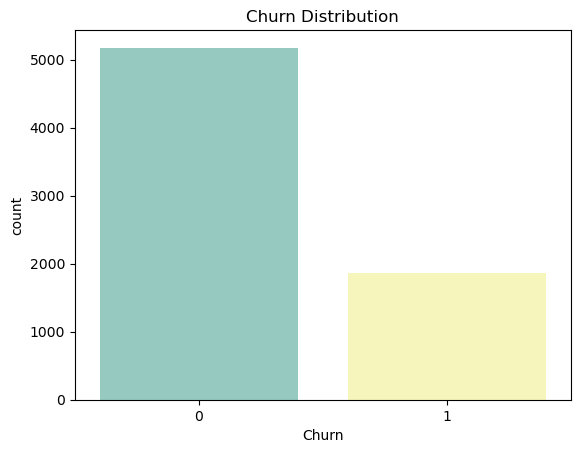

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Churn",data=customer_data,palette="Set3")
plt.title("Churn Distribution")
plt.show()

In [171]:
from sklearn.model_selection import train_test_split

In [173]:
X = customer_data.drop("Churn", axis=1)
y = customer_data["Churn"]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
X_train_clean = X_train.dropna()
y_train_clean = y_train.loc[X_train_clean.index]  

In [179]:
X_test_clean = X_test.dropna()
y_test_clean = y_test.loc[X_test_clean.index]

In [181]:
from imblearn.over_sampling import SMOTE

In [183]:
smt = SMOTE(random_state=42)

In [185]:
X_train_sm,y_train_sm = smt.fit_resample(X_train_clean,y_train_clean)

In [187]:
print(pd.Series(y_train_sm).value_counts(normalize=True))

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


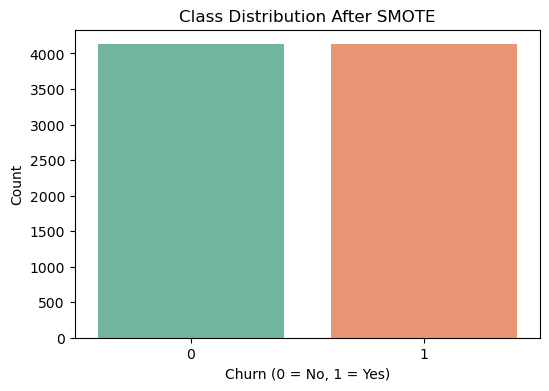

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
y_series = pd.Series(y_train_sm)
plt.figure(figsize=(6,4))
sns.countplot(x=y_series, palette='Set2')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# use Hypertuning

In [193]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [195]:
param_values = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.2, 0.4],
}

In [197]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid = GridSearchCV(estimator=xgb, param_grid=param_values, 
                    scoring='recall', cv=3, verbose=1, n_jobs=-1)

In [199]:
grid.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1], 'gamma': [0, 0.2, 0.4],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='recall', verbose=1)

In [ ]:
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

In [ ]:
print(classification_report(y_test_clean,grid.predict(X_test_clean)))

In [104]:
param_values = {
    'n_estimators': [100],
    'max_depth': [3],
    'subsample': [0.8],
    'learning_rate': [0.01],
    'gamma': [0],
    'colsample_bytree': [1]
}

In [106]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

In [208]:
grid1 = GridSearchCV(estimator=xgb, param_grid=param_values, scoring="recall", cv=3, verbose=1, n_jobs=-1)

In [210]:
grid1.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1], 'gamma': [0, 0.2, 0.4],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='recall', verbose=1)

In [215]:
print(classification_report(y_train_clean,grid1.predict(X_train_clean)))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      4128
           1       0.50      0.78      0.61      1496

    accuracy                           0.74      5624
   macro avg       0.70      0.75      0.71      5624
weighted avg       0.79      0.74      0.75      5624



In [211]:
print(classification_report(y_test_clean,grid1.predict(X_test_clean)))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.80      0.62       373

    accuracy                           0.74      1408
   macro avg       0.71      0.76      0.71      1408
weighted avg       0.80      0.74      0.75      1408

